In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/weatherAUS_regression.csv')
data1=data.copy()

In [ ]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0
1,07-03-2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2
3,03-04-2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0
4,09-09-2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   Location       36881 non-null  object 
 2   MinTemp        36543 non-null  float64
 3   MaxTemp        36639 non-null  float64
 4   Rainfall       36255 non-null  float64
 5   Evaporation    24035 non-null  float64
 6   Sunshine       23317 non-null  float64
 7   WindGustDir    33513 non-null  object 
 8   WindGustSpeed  33520 non-null  float64
 9   WindDir9am     34072 non-null  object 
 10  WindDir3pm     35919 non-null  object 
 11  WindSpeed9am   36219 non-null  float64
 12  WindSpeed3pm   36235 non-null  float64
 13  Humidity9am    36311 non-null  float64
 14  Humidity3pm    36370 non-null  float64
 15  Pressure9am    33309 non-null  float64
 16  Pressure3pm    33329 non-null  float64
 17  Cloud9am       24381 non-null  float64
 18  Cloud3

In [ ]:
data=data.drop(['Date'], axis = 1)

In [ ]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,36543.000000,36639.000000,36255.000000,24035.000000,23317.000000,33520.000000,36219.000000,36235.000000,36311.000000,36370.000000,33309.000000,33329.000000,24381.000000,23899.000000,36394.000000,36437.000000,36261.000000
mean,12.235966,22.939491,2.554823,5.189544,7.544688,40.390573,14.217427,18.874928,69.146953,52.307369,1017.283152,1014.967769,4.331488,4.462321,16.905688,21.485808,2.554748
std,6.389832,6.988266,9.081329,3.765427,3.833809,13.550613,8.997003,8.791849,18.300754,20.317082,7.177877,7.077594,2.848750,2.663067,6.428328,6.820848,8.940267
min,-8.500000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,982.900000,980.200000,0.000000,0.000000,-5.900000,-5.100000,0.000000
25%,7.600000,17.800000,0.000000,2.600000,4.700000,31.000000,7.000000,13.000000,58.000000,38.000000,1012.500000,1010.100000,1.000000,2.000000,12.300000,16.500000,0.000000
50%,12.100000,22.300000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.300000,1015.000000,5.000000,5.000000,16.600000,20.900000,0.000000
75%,17.000000,27.900000,0.800000,7.000000,10.600000,48.000000,20.000000,24.000000,83.000000,66.000000,1022.200000,1019.800000,7.000000,7.000000,21.500000,26.200000,0.800000
max,30.500000,48.100000,371.000000,81.200000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,37.700000,46.100000,367.600000


In [ ]:
data.isnull().sum()

Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
dtype: int64

In [ ]:
data[data.columns[2:]].isnull().sum()*100/len(data[data.columns[2:]])

MaxTemp           0.656164
Rainfall          1.697351
Evaporation      34.830943
Sunshine         36.777745
WindGustDir       9.132073
WindGustSpeed     9.113093
WindDir9am        7.616388
WindDir3pm        2.608389
WindSpeed9am      1.794962
WindSpeed3pm      1.751579
Humidity9am       1.545511
Humidity3pm       1.385537
Pressure9am       9.685204
Pressure3pm       9.630975
Cloud9am         33.892790
Cloud3pm         35.199696
Temp9am           1.320463
Temp3pm           1.203872
RainToday         1.697351
RISK_MM           1.681082
dtype: float64

In [ ]:
# Unique Values Count
val = data.apply(lambda x: len(x.unique()))
val

Location          46
MinTemp          370
MaxTemp          471
Rainfall         433
Evaporation      216
Sunshine         145
WindGustDir       17
WindGustSpeed     65
WindDir9am        17
WindDir3pm        17
WindSpeed9am      40
WindSpeed3pm      40
Humidity9am      100
Humidity3pm      101
Pressure9am      510
Pressure3pm      504
Cloud9am          11
Cloud3pm          10
Temp9am          401
Temp3pm          470
RainToday          3
RISK_MM          431
dtype: int64

In [ ]:
print(data.skew()) #calculating skewness of each column 

MinTemp          -0.009799
MaxTemp           0.206746
Rainfall         10.626797
Evaporation       2.897319
Sunshine         -0.463194
WindGustSpeed     0.898002
WindSpeed9am      0.780412
WindSpeed3pm      0.579725
Humidity9am      -0.461568
Humidity3pm       0.020390
Pressure9am      -0.119386
Pressure3pm      -0.066764
Cloud9am         -0.195121
Cloud3pm         -0.234955
Temp9am           0.064894
Temp3pm           0.237097
RISK_MM          10.073242
dtype: float64


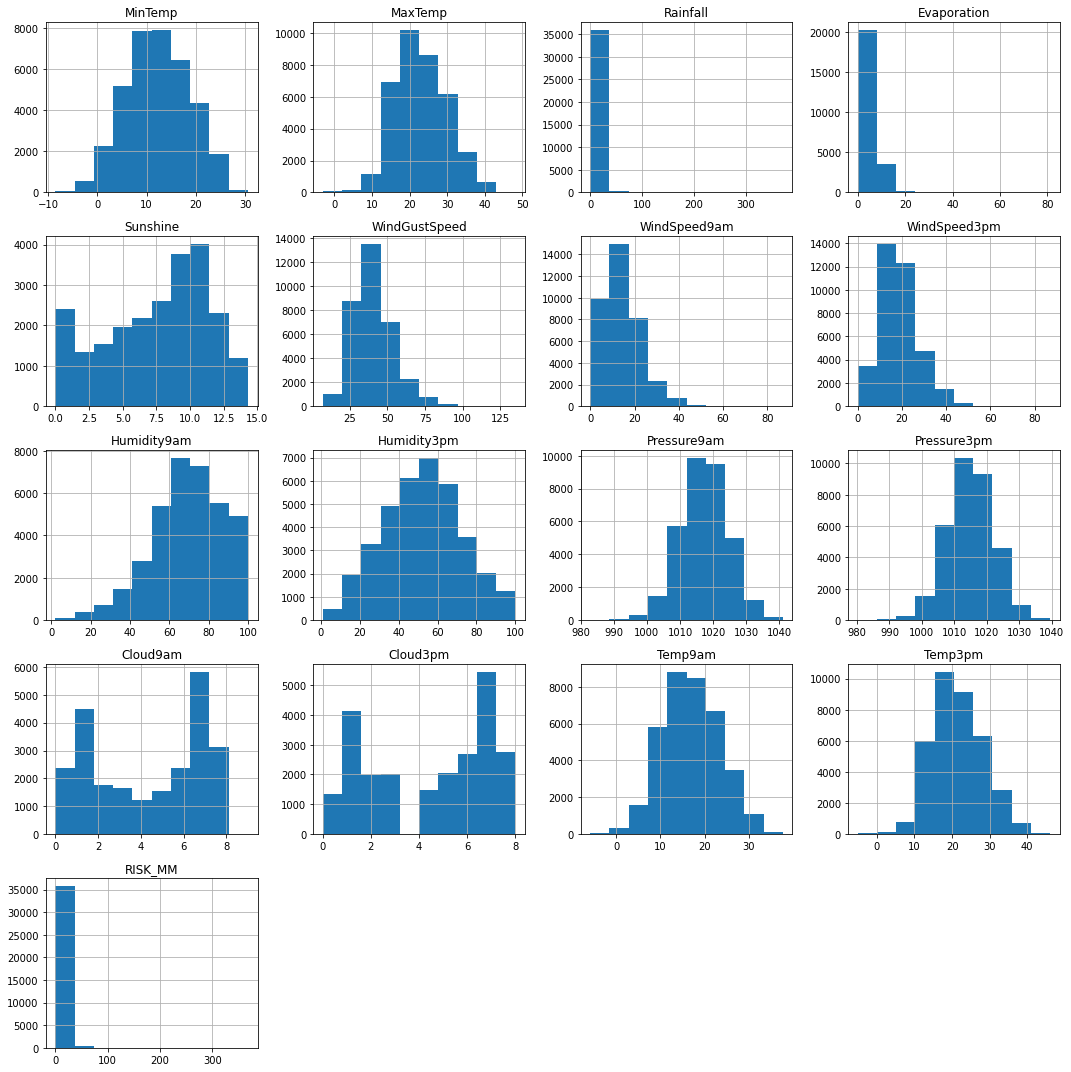

In [ ]:
data.hist(figsize = (15,15))
plt.tight_layout()
plt.show()

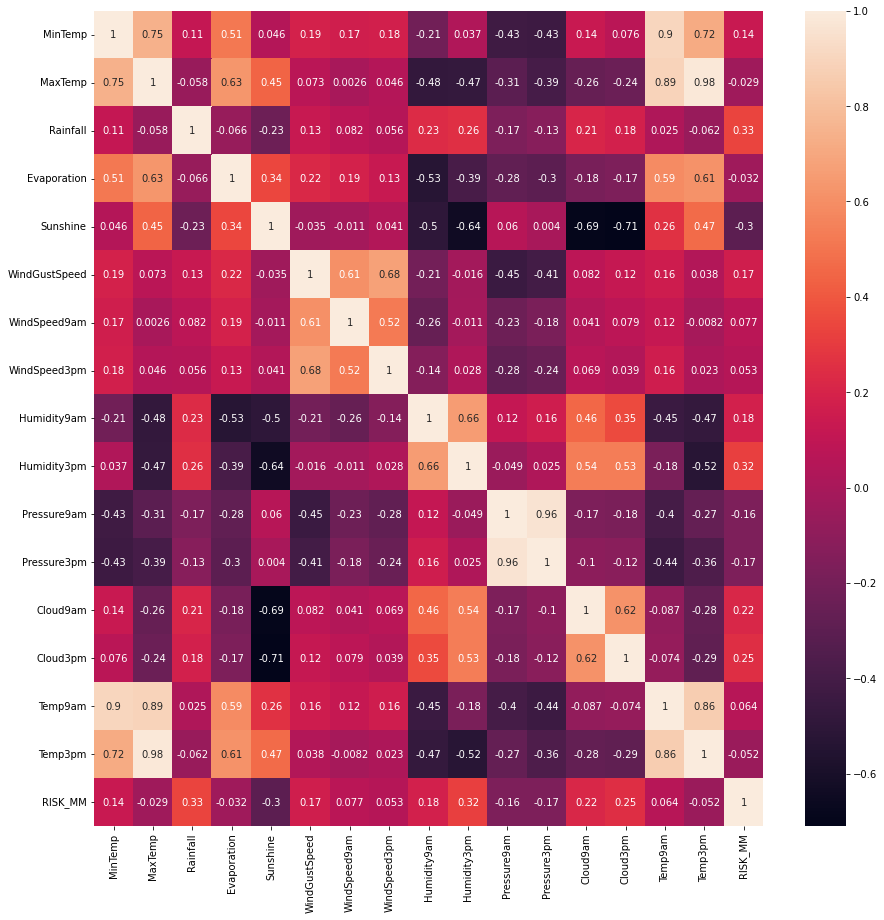

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(15,15))
ax = sns.heatmap(data.corr(), annot=True)


The variables we have taken are :

-Sunshine

-Humidity@3pm

-Cloud@3pm

since their correlation with target variable was good with respect to other variables

In [ ]:
cat_col=[col for col in data if data[col].dtypes=='object']  #Categorical variables
cat_col

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
num_col=[col for col in data if data[col].dtypes=='float64']   #Numerical variables
num_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

#Outlier Detection

In [ ]:
def outliers(df,col):
        IQR=df[col].quantile(0.75)-df[col].quantile(0.25)
        LW=df[col].quantile(0.25)-(IQR*1.5)
        UW=df[col].quantile(0.75)+(IQR*1.5)
        print("For feature {} Lower Whisker is {} and Upper Whisker is {} \n".format(col,LW,UW))

In [ ]:
for x in num_col:
    outliers(data,x)

For feature MinTemp Lower Whisker is -6.500000000000002 and Upper Whisker is 31.1 

For feature MaxTemp Lower Whisker is 2.650000000000004 and Upper Whisker is 43.05 

For feature Rainfall Lower Whisker is -1.2000000000000002 and Upper Whisker is 2.0 

For feature Evaporation Lower Whisker is -4.0 and Upper Whisker is 13.600000000000001 

For feature Sunshine Lower Whisker is -4.1499999999999995 and Upper Whisker is 19.45 

For feature WindGustSpeed Lower Whisker is 5.5 and Upper Whisker is 73.5 

For feature WindSpeed9am Lower Whisker is -12.5 and Upper Whisker is 39.5 

For feature WindSpeed3pm Lower Whisker is -3.5 and Upper Whisker is 40.5 

For feature Humidity9am Lower Whisker is 20.5 and Upper Whisker is 120.5 

For feature Humidity3pm Lower Whisker is -4.0 and Upper Whisker is 108.0 

For feature Pressure9am Lower Whisker is 997.9499999999999 and Upper Whisker is 1036.75 

For feature Pressure3pm Lower Whisker is 995.5500000000002 and Upper Whisker is 1034.35 

For feature Clou

#Basic Imputation

In [ ]:
for k in cat_col:
    if(k!="Date"):
        data[k]=data[k].fillna(data[k].value_counts().index[0])

#Imputing missing value for categorical Variables and replacing NaN values with mode of that feature.

In [ ]:
for b in num_col:
    data[b]=data[b].fillna(data[b].median())

#Missing value Imputation for Continuous Varibles

In [ ]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       36881 non-null  object 
 1   MinTemp        36881 non-null  float64
 2   MaxTemp        36881 non-null  float64
 3   Rainfall       36881 non-null  float64
 4   Evaporation    36881 non-null  float64
 5   Sunshine       36881 non-null  float64
 6   WindGustDir    36881 non-null  object 
 7   WindGustSpeed  36881 non-null  float64
 8   WindDir9am     36881 non-null  object 
 9   WindDir3pm     36881 non-null  object 
 10  WindSpeed9am   36881 non-null  float64
 11  WindSpeed3pm   36881 non-null  float64
 12  Humidity9am    36881 non-null  float64
 13  Humidity3pm    36881 non-null  float64
 14  Pressure9am    36881 non-null  float64
 15  Pressure3pm    36881 non-null  float64
 16  Cloud9am       36881 non-null  float64
 17  Cloud3pm       36881 non-null  float64
 18  Temp9a

In [ ]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,SSE,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0
1,Launceston,1.1,14.5,0.4,4.6,8.4,SSW,50.0,E,SW,...,99.0,46.0,1001.5,1002.4,5.0,5.0,1.3,13.7,No,0.0
2,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,SSE,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2
3,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,SW,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0
4,GoldCoast,14.6,25.3,0.0,4.6,8.4,NNW,43.0,WNW,N,...,64.0,67.0,1020.3,1015.0,5.0,5.0,22.2,22.6,No,0.4


In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
le =LabelEncoder()
data[cat_col]= data[cat_col].apply(le.fit_transform)

In [ ]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,15,5.1,14.3,0.0,1.8,8.9,7,30.0,15,10,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,0,0.0
1,16,1.1,14.5,0.4,4.6,8.4,11,50.0,0,12,...,99.0,46.0,1001.5,1002.4,5.0,5.0,1.3,13.7,0,0.0
2,42,19.7,26.2,0.0,7.2,7.2,10,41.0,10,10,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,0,0.2
3,30,16.6,28.0,0.0,9.0,11.3,12,54.0,10,12,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,0,0.0
4,14,14.6,25.3,0.0,4.6,8.4,6,43.0,14,3,...,64.0,67.0,1020.3,1015.0,5.0,5.0,22.2,22.6,0,0.4


#MICE Value Imputation

In [ ]:
le =LabelEncoder()
data1= data1.apply(le.fit_transform)

In [ ]:
data1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,1124,15,123,158,0,17,89,7,12,15,...,63,46,337,350,1,1,128,161,0,0
1,282,16,83,160,4,215,144,11,23,0,...,97,45,121,151,10,9,50,165,0,0
2,937,42,269,277,0,69,72,10,18,10,...,46,49,315,347,6,4,264,272,0,2
3,117,30,238,295,0,84,113,12,25,10,...,48,40,289,276,6,1,237,289,0,0
4,403,14,218,268,0,215,144,6,19,14,...,62,66,309,277,10,9,259,254,0,4


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Date           36881 non-null  int64
 1   Location       36881 non-null  int64
 2   MinTemp        36881 non-null  int64
 3   MaxTemp        36881 non-null  int64
 4   Rainfall       36881 non-null  int64
 5   Evaporation    36881 non-null  int64
 6   Sunshine       36881 non-null  int64
 7   WindGustDir    36881 non-null  int64
 8   WindGustSpeed  36881 non-null  int64
 9   WindDir9am     36881 non-null  int64
 10  WindDir3pm     36881 non-null  int64
 11  WindSpeed9am   36881 non-null  int64
 12  WindSpeed3pm   36881 non-null  int64
 13  Humidity9am    36881 non-null  int64
 14  Humidity3pm    36881 non-null  int64
 15  Pressure9am    36881 non-null  int64
 16  Pressure3pm    36881 non-null  int64
 17  Cloud9am       36881 non-null  int64
 18  Cloud3pm       36881 non-null  int64
 19  Temp

In [ ]:
data1.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
dtype: int64

In [ ]:
# Imputing with MICE
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(),missing_values=0, n_nearest_features=None, imputation_order='ascending')
data_imputed = pd.DataFrame(mice_imputer.fit_transform(data1), columns=data1.columns)

In [ ]:
data_imputed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,1124.0,15.0,123.0,158.0,-21.935270,17.0,89.0,7.0,12.0,15.00000,...,63.0,46.0,337.0,350.0,1.0,1.0,128.0,161.0,0.882048,-37.562813
1,282.0,16.0,83.0,160.0,4.000000,215.0,144.0,11.0,23.0,9.93265,...,97.0,45.0,121.0,151.0,10.0,9.0,50.0,165.0,0.886224,2.171352
2,937.0,42.0,269.0,277.0,25.306849,69.0,72.0,10.0,18.0,10.00000,...,46.0,49.0,315.0,347.0,6.0,4.0,264.0,272.0,0.993218,2.000000
3,117.0,30.0,238.0,295.0,55.840474,84.0,113.0,12.0,25.0,10.00000,...,48.0,40.0,289.0,276.0,6.0,1.0,237.0,289.0,1.091409,38.666970
4,403.0,14.0,218.0,268.0,4.321652,215.0,144.0,6.0,19.0,14.00000,...,62.0,66.0,309.0,277.0,10.0,9.0,259.0,254.0,0.903320,4.000000


#Multiple Regression

##With MICE


In [ ]:
X=data_imputed.drop("RISK_MM",axis=1)
y=data_imputed["RISK_MM"]
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=80)


In [ ]:
x = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                RISK_MM   R-squared (uncentered):                   0.626
Model:                            OLS   Adj. R-squared (uncentered):              0.625
Method:                 Least Squares   F-statistic:                              2801.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):                        0.00
Time:                        13:17:43   Log-Likelihood:                     -1.9616e+05
No. Observations:               36881   AIC:                                  3.924e+05
Df Residuals:                   36859   BIC:                                  3.926e+05
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Date             -0.0062      0.001    -10.215      0.000      -0.007      -0.005
Location          0.0547      0.021      2.664      0.008       0.014       0.095
MinTemp          -0.1275      0.009    -14.026      0.000      -0.145      -0.110
MaxTemp           0.1941      0.011     18.197      0.000       0.173       0.215
Rainfall          0.5774      0.005    107.557      0.000       0.567       0.588
Evaporation      -0.0295      0.005     -5.574      0.000      -0.040      -0.019
Sunshine          0.0390      0.009      4.284      0.000       0.021       0.057
WindGustDir      -0.8560      0.082    -10.402      0.000      -1.017      -0.695
WindGustSpeed     1.3182      0.023     56.424      0.000       1.272       1.364
WindDir9am       -0.4714      0.065     -7.267      0.000      -0.599      -0.344
WindDir3pm       -0.5550      0.076     -7.259      0.000      -0.705      -0.405
WindSpeed9am     -1.3388      0.062    -21.662      0.000      -1.460      -1.218
WindSpeed3pm      0.0631      0.059      1.064      0.287      -0.053       0.179
Humidity9am      -0.7610      0.020    -37.542      0.000      -0.801      -0.721
Humidity3pm       1.1575      0.021     54.193      0.000       1.116       1.199
Pressure9am       0.1430      0.011     12.835      0.000       0.121       0.165
Pressure3pm      -0.1961      0.011    -17.506      0.000      -0.218      -0.174
Cloud9am          0.7819      0.131      5.967      0.000       0.525       1.039
Cloud3pm          0.6947      0.146      4.753      0.000       0.408       0.981
Temp9am          -0.1186      0.010    -12.189      0.000      -0.138      -0.100
Temp3pm          -0.0040      0.009     -0.429      0.668      -0.022       0.014
RainToday        15.1334      2.300      6.579      0.000      10.625      19.642
==============================================================================
Omnibus:                    22793.142   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           740057.973
Skew:                           2.453   Prob(JB):                         0.00
Kurtosis:                      24.389   Cond. No.                     9.21e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Without MICE

In [ ]:
X=data.drop('RISK_MM',axis=1)
y=data['RISK_MM']
X_train, x_test, Y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=56)

In [ ]:
x=sm.add_constant(X)
est=sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                RISK_MM   R-squared (uncentered):                   0.279
Model:                            OLS   Adj. R-squared (uncentered):              0.279
Method:                 Least Squares   F-statistic:                              680.2
Date:                Fri, 27 Jan 2023   Prob (F-statistic):                        0.00
Time:                        13:17:43   Log-Likelihood:                     -1.2822e+05
No. Observations:               36881   AIC:                                  2.565e+05
Df Residuals:                   36860   BIC:                                  2.567e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Location         -0.0115      0.003     -3.709      0.000      -0.018      -0.005
MinTemp          -0.0880      0.019     -4.624      0.000      -0.125      -0.051
MaxTemp           0.0748      0.030      2.529      0.011       0.017       0.133
Rainfall          0.2258      0.005     42.640      0.000       0.215       0.236
Evaporation       0.0883      0.017      5.294      0.000       0.056       0.121
Sunshine         -0.3351      0.019    -17.982      0.000      -0.372      -0.299
WindGustDir      -0.0035      0.012     -0.298      0.766      -0.027       0.020
WindGustSpeed     0.1275      0.005     27.654      0.000       0.118       0.136
WindDir9am       -0.0171      0.010     -1.673      0.094      -0.037       0.003
WindDir3pm        0.0260      0.011      2.272      0.023       0.004       0.048
WindSpeed9am      0.0114      0.006      1.827      0.068      -0.001       0.024
WindSpeed3pm     -0.0806      0.006    -12.532      0.000      -0.093      -0.068
Humidity9am      -0.0052      0.004     -1.200      0.230      -0.014       0.003
Humidity3pm       0.1431      0.005     30.374      0.000       0.134       0.152
Pressure9am       0.4953      0.026     19.351      0.000       0.445       0.546
Pressure3pm      -0.5068      0.026    -19.757      0.000      -0.557      -0.456
Cloud9am         -0.0836      0.024     -3.448      0.001      -0.131      -0.036
Cloud3pm          0.1206      0.026      4.620      0.000       0.069       0.172
Temp9am           0.0157      0.027      0.584      0.559      -0.037       0.068
Temp3pm           0.1278      0.033      3.884      0.000       0.063       0.192
RainToday         0.2500      0.123      2.037      0.042       0.009       0.491
==============================================================================
Omnibus:                    57043.630   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         63140238.195
Skew:                           9.536   Prob(JB):                         0.00
Kurtosis:                     204.802   Cond. No.                     4.34e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from hyperopt import fmin, hp, STATUS_OK, tpe , Trials
from hyperopt.pyll.base import scope
import hyperopt

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
gbm_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()

In [ ]:
param_dt={
    'max_depth': scope.int(hp.quniform('max_depth',2,20,1)),
    'ccp_alpha': hp.uniform('ccp_alpha',0.001,0.1)
}

param_rf={
    'n_estimators':scope.int(hp.quniform('n_estimators',50,200,1)),
    'max_features':hp.choice('max_features',list(range(2,7)))
}

param_gbm = {
    'max_depth':scope.int(hp.quniform('max_depth',1,6,1)),
    'n_estimators':scope.int(hp.quniform('n_estimators',50,200,1)),
    'learning_rate':hp.uniform('learning_rate',0.001,0.1)
}

param_xgb = {
    'max_depth':scope.int(hp.quniform('max_depth',1,6,1)),
    'n_estimators':scope.int(hp.quniform('n_estimators',50,200,1)),
    'learning_rate':hp.uniform('learning_rate',0.001,0.1),
    'colsample_bytree':hp.uniform('colsample_bytree',0.2,0.8)
}

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
def rmse(y_act, y_pred):
  return (np.sqrt(np.mean((y_act-y_pred)**2)))

rmse = make_scorer(rmse, greater_is_better=False)

#Decision Tree

In [ ]:
def hp_obj_func_dt(param):
  dt= DecisionTreeRegressor(**param)
  out=cross_val_score(dt, X=X_train, y= y_train, scoring='neg_root_mean_squared_error', cv=5).mean()
  print(out)
  return out

In [ ]:
def surr_func_dt(params):
  perf= hp_obj_func_dt(params)
  return {'loss':-perf,'status': STATUS_OK}

In [ ]:
trials = Trials()
best_dt = fmin(surr_func_dt, space=param_dt, algo=tpe.suggest,
               max_evals=100, trials=trials)
print('best_dt:')
print(best_dt)

-72.7537510946976
-72.38376371477655
-70.44287130483272
-85.55734594921843
-89.49271114283363
-69.6957014840992
-73.24344802444463
-76.42717590950649
-87.38276738002773
-78.10598754485967
-69.85922353207302
-87.47271623945846
-70.33373002140452
-69.89572699398913
-72.34823196476853
-73.35268748349083
-74.93447213963125
-80.17204951897224
-73.52821122673552
-69.72052095194337
-69.56945653729862
-69.60838112795896
-69.59221795804584
-70.28246597811594
-69.5279550709975
-69.5279550709975
-69.63802554038861
-69.79371818187457
-70.75805230429455
-71.78042704391713
-69.66296907487845
-70.1700490376679
-69.62825087407728
-83.55962104041171
-71.6698563342226
-82.00242401815399
-69.70272723149598
-70.02765136421804
-70.72978046278139
-70.09970181004947
-69.65182916415807
-76.4556205319027
-70.96806350722605
-69.7527353830516
-69.79953092683513
-71.57185052028026
-69.52795507099752
-74.79181746509134
-89.08563923816385
-72.66645774013583
-70.2080314632243
-69.5750827262595
-87.50469403200107
-77

In [ ]:
dt_reg = DecisionTreeRegressor(**best_dt)
dt_reg.fit(X_train, y_train)
pred_dt = dt_reg.predict(x_test)
print(mean_squared_error(pred_dt, y_test))

1487.244959844105


#Random Forest

In [ ]:
def hp_obj_func_rf(param):
  rf= RandomForestRegressor(**param)
  out=cross_val_score(rf, X=X_train, y= y_train, scoring='neg_root_mean_squared_error', cv=5).mean()
  print(out)
  return out

In [ ]:
def surr_func_rf(params):
  perf= hp_obj_func_rf(params)
  return {'loss':-perf,'status': STATUS_OK}

In [ ]:
trials = Trials()
best_rf = fmin(surr_func_rf, space=param_rf, algo=tpe.suggest,
               max_evals=5, trials=trials)
print('best_rf:')
print(best_rf)

-70.83288392730059
-70.89983581852037
-71.22126363067683
-70.88626895467067
-70.75339233443785
100%|██████████| 5/5 [05:30<00:00, 66.11s/it, best loss: 70.75339233443785]
best_rf:
{'max_features': 3, 'n_estimators': 159.0}


In [ ]:
best_rf={'max_features': 3, 'n_estimators': 761}

In [ ]:
rf_reg = RandomForestRegressor(**best_rf)
rf_reg.fit(X_train, y_train)
pred_rf = rf_reg.predict(x_test)
print(mean_squared_error(pred_rf, y_test))

1836.3867711593555


#GBM

In [ ]:
def hp_obj_func_gbm(param):
  gbm= GradientBoostingRegressor(**param)
  out=cross_val_score(gbm, X=X_train, y= y_train, scoring='neg_root_mean_squared_error', cv=5).mean()
  print(out)
  return out

In [ ]:
def surr_func_gbm(params):
  perf= hp_obj_func_gbm(params)
  return {'loss':-perf,'status': STATUS_OK}

In [ ]:
trials = Trials()
best_gbm = fmin(surr_func_gbm, space=param_gbm, algo=tpe.suggest,
               max_evals=20, trials=trials)
print('best_gbm:')
print(best_gbm)

-69.62267303816812
-69.7824466695579
-69.57704166433507
-71.68996585637673
-69.52915473362728
-69.79486242250393
-70.38415704412888
-69.83885765127805
-69.69779189891295
-69.5428787720011
-69.76879395641967
-69.56426296962209
-69.59606626136345
-69.75670052565981
-70.10883771233162
-69.81094957048765
-69.61419902286755
-69.52714874564538
-70.12275694667285
-69.53242071241036
100%|██████████| 20/20 [15:44<00:00, 47.24s/it, best loss: 69.52714874564538]
best_gbm:
{'learning_rate': 0.0789282433174882, 'max_depth': 1.0, 'n_estimators': 65.0}


In [ ]:
best_gbm={'learning_rate': 0.0789282433174882, 'max_depth': 1, 'n_estimators': 65}

In [ ]:
gbm_reg = GradientBoostingRegressor(**best_gbm)
gbm_reg.fit(X_train, y_train)
pred_gbm = gbm_reg.predict(x_test)
print(mean_squared_error(pred_gbm, y_test))

1492.9188674010147


#SVM

In [ ]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, y_train) 

SVR()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print("RMSE for linear SVR:",np.sqrt(mean_squared_error(y_test,svr_linear.predict(x_test))))
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_rbf.predict(x_test))))

RMSE for linear SVR: 22.60094226054266
RMSE for RBF kernelized SVR: 22.048905595079408
